In [1]:
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets

In [3]:
from sklearn import svm

In [4]:
digits = datasets.load_digits()

In [8]:
print(digits.data)
print(digits.target)
print(digits.images[0])

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
[0 1 2 ... 8 9 8]
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


In [33]:
clf = svm.SVC(gamma=0.1, C=100)

In [34]:
x, y = digits.data[:-10], digits.target[:-10]
clf.fit(x,y)

SVC(C=100, gamma=0.1)

Prediction: [3]


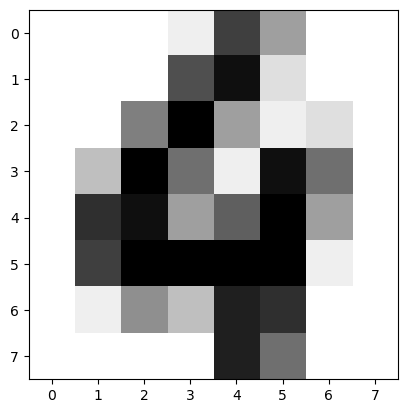

In [35]:
nbr = -9
sample_to_predict = digits.data[nbr].reshape(1, -1)

print('Prediction:', clf.predict(sample_to_predict))
plt.imshow(digits.images[nbr], cmap=plt.cm.gray_r, interpolation="nearest")

In [1]:
import pandas as pd
import os
import time
from datetime import datetime
from time import mktime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style
style.use("dark_background")
import re

In [2]:
path = "C:/Users/riadb/Downloads/intraQuarter"

In [3]:
%matplotlib widget

def Key_Stats(gather="Total Debt/Equity (mrq)"):
    statspath = path + '/_KeyStats'
    stock_list = [x[0] for x  in os.walk(statspath)]
    # print(stock_list)
    df = pd.DataFrame(columns = ['Date',
                                 'Unix',
                                 'Ticker',
                                 'DE Ratio',
                                 'Price',
                                 'stock_p_change',
                                 'SP500',
                                 'sp500_p_change',
                                 'Difference']) #dataframe created b7al matrice or excel
    
    sp500_df = pd.read_csv("yahoo-index.csv") #sp500 is the performance of 500 best societe f marche usa

    ticker_list = [] #all charikat
    
    for each_dir in stock_list[1:50]: #all charikat stocks
        each_file = os.listdir(each_dir)
        
        ticker = each_dir.split("\\")[1] #we get smia ta3 charika
        ticker_list.append(ticker)  #we add it to the list
        
        starting_stock_value = False #stock ta3 had charika
        starting_sp500_value = False
        
        if len(each_file) > 0:
            for file in each_file: #all stocks ta3 charika
                
                date_stamp = datetime.strptime(file, '%Y%m%d%H%M%S.html') #w9ita ta3 stock X
                unix_time = time.mktime(date_stamp.timetuple()) 
                
                full_file_path = each_dir + '/' + file #9raw stock X
                src = open(full_file_path, 'r')
                source = src.read()
                
                try:
                    try:
                        value = float(source.split(gather + ':</td><td class="yfnc_tabledata1">')[1].split('</td>')[0]) #total debt/equity ta3 charika
                    except Exception as e:
                        value = float(source.split(gather + ':</td>\n<td class="yfnc_tabledata1">')[1].split('</td>')[0]) #total debt/equity ta3 charika
                    try:
                        sp500_date = datetime.fromtimestamp(unix_time).strftime('%Y-%m-%d') #we make date mn unix time ta3 stock ta3 charika
                        row = sp500_df[(sp500_df.Date ==  sp500_date)] #ila kant hadik date f sp500 kan 7to data ta3ha here
                        sp500_value = float(row["Adj Close"].iloc[0])  #kan nakhdo value ta3 sp500 n7toha hna mn row
                    except Exception as ee:
                        sp500_date = datetime.fromtimestamp(unix_time-259200).strftime('%m-%d-%Y') #3days magic value 3600*24*3 to get out of weekend
                        row = sp500_df[(sp500_df.Date ==  sp500_date)]
                        sp500_value = float(row["Adj Close"].iloc[0])

                    try:
                        stock_price = float(source.split('</small><big><b>')[1].split('</b></big>')[0]) #actual stock price mn file ta3 charika X
                    except:
                        try:
                            stock_price = (source.split('</small><big><b>')[1].split('</b></big>')[0]) #actual stock price mn file ta3 charika X
                            stock_price = re.search(r'(\d{1,8}\.\d{1,8})', stock_price)
                            stock_price = float(stock_price.group(1))
                        except:
                            stock_price = (source.split('<span class="time_rtq_ticker">')[1].split('</span>'))
                            stock_price = re.search(r'(\d{1,8}\.\d{1,8})', stock_price)
                            stock_price = float(stock_price.group(1))
                        
                    if not starting_stock_value:
                        starting_stock_value = stock_price
                    if not starting_sp500_value:
                        starting_sp500_value = sp500_value
                        
                    stock_p_change = ((stock_price - starting_stock_value) / starting_stock_value) * 100
                    sp500_p_change = ((sp500_value - starting_sp500_value) / starting_sp500_value) * 100
                    difference = stock_p_change-sp500_p_change
                    # print(stock_price,' ',ticker)
                    
                    df = df._append({'Date':date_stamp, #date ta3 stock
                                     'Unix':unix_time,#time b unix
                                     'Ticker':ticker, #smia ta3 charika
                                     'DE Ratio':value, #debt/equity
                                     'Price':stock_price, #price ta3 stock in this day X
                                     'stock_p_change':stock_p_change, # chhal ta3 change mn lwl htal l stock ta3 db
                                     'SP500':sp500_value, #value ta3 sp500 equivalent to that day
                                     'sp500_p_change':sp500_p_change, # chhal ta3 change mn lwl htal l sp500 ta3 db
                                     'Difference':difference, # chhal ta3 difference between sp500 o stock f%
                                    },ignore_index = True)
                except Exception as e:
                    pass
                src.close()

    for each_ticker in ticker_list: #all charikat
        try:
            plot_df = df[(df['Ticker'] == each_ticker)] #kan 9elbo 3la charika and their data
            plot_df = plot_df.set_index(['Date']) # time f plot
            plot_df['Difference'].plot(label=each_ticker) #kan weriw difference between sp500 o stock lkola charika over time
            plt.legend()
        except:
            pass

    plt.show()
    save = gather.replace(' ','').replace(')','').replace('(','').replace('/','')+('.csv')
    # print(save)
    df.to_csv(save)

C:\Users\riadb\AppData\Local\Temp\ipykernel_10736\4031412879.py:76: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = df._append({'Date':date_stamp, #date ta3 stock


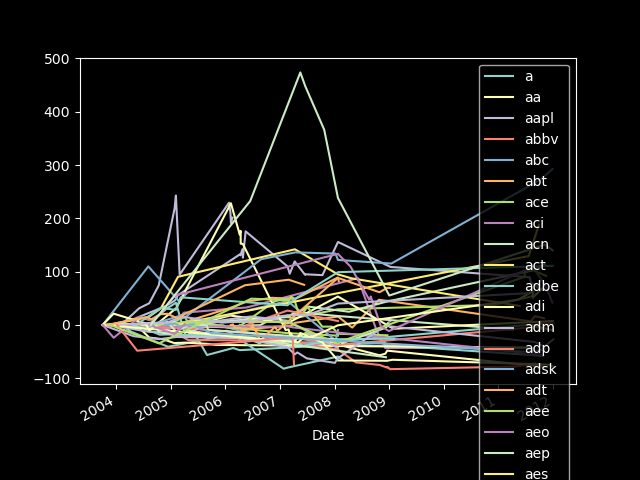

In [4]:
Key_Stats()